In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,fnmatch

In [2]:
tipo='cuts'
ruta='resultsgmm-nolineal/geodesicdistance-partial/'+tipo+'/'
files=os.listdir(ruta)
lenfiles=len(files)
pattern='*.txt'
step=0.005
thresh = np.arange(0,0.2+step,step)
tamth=thresh.shape[0]
allcurves=[]

# averageCurve=np.zeros((tamth,))
for fi in files:
    if fnmatch.fnmatch(fi, pattern):
        print('File:',fi)
        geodist = np.loadtxt(ruta+fi, dtype=float)
        
        curve=[]
        for i in range(tamth):
            curve.append(100*np.sum(geodist<=thresh[i])/geodist.shape[0])
        # curve=np.array(curve)
        allcurves.append(curve)
        # averageCurve=averageCurve+curve
# averageCurve=averageCurve/lenfiles
allcurves=np.array(allcurves)

File: cuts_cat_shape_1.txt
File: cuts_cat_shape_10.txt
File: cuts_cat_shape_11.txt
File: cuts_cat_shape_12.txt
File: cuts_cat_shape_13.txt
File: cuts_cat_shape_14.txt
File: cuts_cat_shape_15.txt
File: cuts_cat_shape_2.txt
File: cuts_cat_shape_3.txt
File: cuts_cat_shape_4.txt
File: cuts_cat_shape_5.txt
File: cuts_cat_shape_6.txt
File: cuts_cat_shape_7.txt
File: cuts_cat_shape_8.txt
File: cuts_cat_shape_9.txt
File: cuts_centaur_shape_1.txt
File: cuts_centaur_shape_10.txt
File: cuts_centaur_shape_11.txt
File: cuts_centaur_shape_12.txt
File: cuts_centaur_shape_13.txt
File: cuts_centaur_shape_14.txt
File: cuts_centaur_shape_15.txt
File: cuts_centaur_shape_2.txt
File: cuts_centaur_shape_3.txt
File: cuts_centaur_shape_4.txt
File: cuts_centaur_shape_5.txt
File: cuts_centaur_shape_6.txt
File: cuts_centaur_shape_7.txt
File: cuts_centaur_shape_8.txt
File: cuts_centaur_shape_9.txt
File: cuts_david_shape_1.txt
File: cuts_david_shape_10.txt
File: cuts_david_shape_12.txt
File: cuts_david_shape_14.txt

In [3]:
averageCurve=np.mean(allcurves,axis=0)
stdCurve=np.std(allcurves,axis=0)
np.savetxt(tipo+'-nonlineargmm.txt',averageCurve)

In [4]:
if tipo=='holes':
    acnn=np.loadtxt('otrosmetodos/ACNNholes.txt', dtype=float)
    pfm=np.loadtxt('otrosmetodos/PFMholes.txt', dtype=float)
    rf=np.loadtxt('otrosmetodos/RFholes.txt', dtype=float)
else:
    acnn=np.loadtxt('otrosmetodos/acnncuts.txt', dtype=float)
    pfm=np.loadtxt('otrosmetodos/pfmcuts.txt', dtype=float)
    rf=np.loadtxt('otrosmetodos/rfcuts.txt', dtype=float)

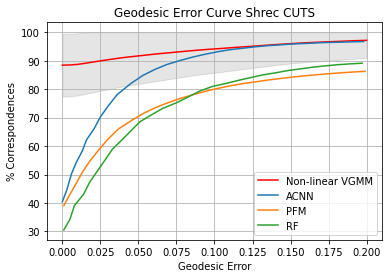

In [5]:
plt.plot(thresh,averageCurve, '-', color='red', label='Non-linear VGMM')
limsup=averageCurve + stdCurve
index=limsup>100
limsup[index]=100
plt.fill_between(thresh, averageCurve - stdCurve,limsup ,
                 color='black', alpha=0.1)
plt.plot(acnn[:,0],acnn[:,1], label='ACNN')
plt.plot(pfm[:,0],pfm[:,1], label='PFM')
plt.plot(rf[:,0],rf[:,1], label='RF')
plt.grid(True)
plt.title('Geodesic Error Curve Shrec '+tipo.upper())
plt.xlabel('Geodesic Error')
plt.ylabel('% Correspondences')
plt.legend()
plt.savefig('resultsgmm-nolineal/shreccurve'+tipo.upper()+'.pdf')
plt.show()

In [6]:
from scipy.interpolate import interp1d

f = interp1d(averageCurve, thresh)
val=f(90)
print('Geodesic error for 90%:',val)

Geodesic error for 90%: 0.025749596067354878
